# LVM Guide Star Catalog using the new library

In [2]:
import lvmguiding
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from astropy.coordinates import SkyCoord
from importlib import reload
from matplotlib.colors import LogNorm
import healpy as hp
from astropy.io import fits

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
def get_cat_using_healpix(c,plotflag=False):
    vec = hp.ang2vec(np.deg2rad(c.dec.value+90),np.deg2rad(c.ra.value))

    ipix_disc = hp.query_disc(nside=64, vec=vec, radius=np.deg2rad(0.7),inclusive=True)
    print(ipix_disc)

    if plotflag:
        fig,ax = plt.subplots(figsize=(12,12))
        ax.set_aspect("equal")


    counter=0
    for ipix in ipix_disc:
        filename = "Gaia_Healpix_64/{:06d}.fits".format(ipix)

        hdul = fits.open(filename)
        data= Table(hdul[1].data)
        print(filename,len(data))
        #data = data.filled()
        if plotflag:
            ax.plot(data["ra"],data["dec"],".",alpha=0.5)
        if counter==0:
            data_combined = data
            counter+=1
        else:
            data_combined = vstack([data_combined, data])
    return data_combined


In [4]:
def get_cat_using_healpix2(c,plotflag=False):
    vec = hp.ang2vec(np.deg2rad(c.dec.value+90),np.deg2rad(c.ra.value))

    ipix_disc = hp.query_disc(nside=64, vec=vec, radius=np.deg2rad(0.7),inclusive=True)
    print(ipix_disc)

    if plotflag:
        fig,ax = plt.subplots(figsize=(12,12))
        ax.set_aspect("equal")


    counter=0
    for ipix in ipix_disc:
        filename = "Gaia_Healpix_64/{:06d}.fits".format(ipix)

        hdul = fits.open(filename)
        data= Table(hdul[1].data)
        print(filename,len(data))
        #data = data.filled()
        if plotflag:
            ax.plot(data["ra"],data["dec"],".",alpha=0.5)
        if counter==0:
            data_combined = data
            counter+=1
        else:
            data_combined = vstack([data_combined, data])
    return data_combined

In [5]:
lvmguiding.cat_full.shape

(157645865,)

RA: 40.7812   DEC: 34.9539


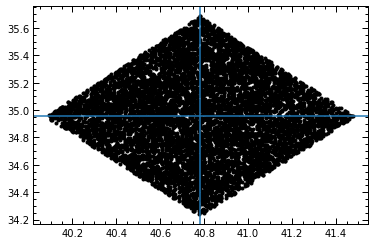

In [29]:

ipix = 1000
test_data = np.load("Gaia_Healpix_6/lvl6_{:06d}.npy".format(ipix))

central_pixel = hp.pix2ang(nside=2**6,ipix=ipix,nest=True)

pix_ra = np.rad2deg(central_pixel[1])
pix_dec = -np.rad2deg(central_pixel[0])+90

print("RA: {:.4f}   DEC: {:.4f}".format(pix_ra,pix_dec))
fig,ax = plt.subplots()
ax.plot(test_data["ra"],test_data["dec"],"k.")
ax.axhline(pix_dec)
ax.axvline(pix_ra)

#np.rad2deg(hp.pix2ang(nside=2**6,ipix=1,nest=True))

## Creating the pointing list

In [47]:
!pwd

/home/haeberle/Projects/LVM/LVM_Guide_Stars/lvmguiding


## Making some example plots

In [6]:
#What is going on at <SkyCoord (ICRS): (ra, dec) in deg
#    (80.01870621, -68.35233157)>

coordinates_crowded = SkyCoord(270.48085943, -28.45945724,unit="deg")
coordinates_median = SkyCoord(195.10462204, -55.248677,unit="deg")
coordinates_empty = SkyCoord(184.18604651, 15.16853933,unit="deg")

c = coordinates_empty


In [61]:
from astropy.table import Table, hstack, vstack

In [10]:
from importlib import reload 

In [14]:
reload(lvmguiding)

<module 'lvmguiding' from '/home/haeberle/Projects/LVM/LVM_Guide_Stars/lvmguiding/lvmguiding.py'>

[30467 30722 30723 30978 30979 30980 31234 31235 31491]
Gaia_Healpix_64/030467.fits 367
Gaia_Healpix_64/030722.fits 327
Gaia_Healpix_64/030723.fits 371
Gaia_Healpix_64/030978.fits 370
Gaia_Healpix_64/030979.fits 353
Gaia_Healpix_64/030980.fits 354
Gaia_Healpix_64/031234.fits 341
Gaia_Healpix_64/031235.fits 359
Gaia_Healpix_64/031491.fits 385

Duration using healpix preselection: 0.1709 s

[27860 27861 27862 27863 27868 27869 28032 28034 28040]
Gaia_Healpix_6/lvl6_027860.npy 2652
Gaia_Healpix_6/lvl6_027861.npy 2597
Gaia_Healpix_6/lvl6_027862.npy 2675
Gaia_Healpix_6/lvl6_027863.npy 2532
Gaia_Healpix_6/lvl6_027868.npy 2434
Gaia_Healpix_6/lvl6_027869.npy 2562
Gaia_Healpix_6/lvl6_028032.npy 2411
Gaia_Healpix_6/lvl6_028034.npy 2504
Gaia_Healpix_6/lvl6_028040.npy 2576

Duration using healpix preselection 2: 0.0564 s


Duration using full Gaia cat: 2.8430 s


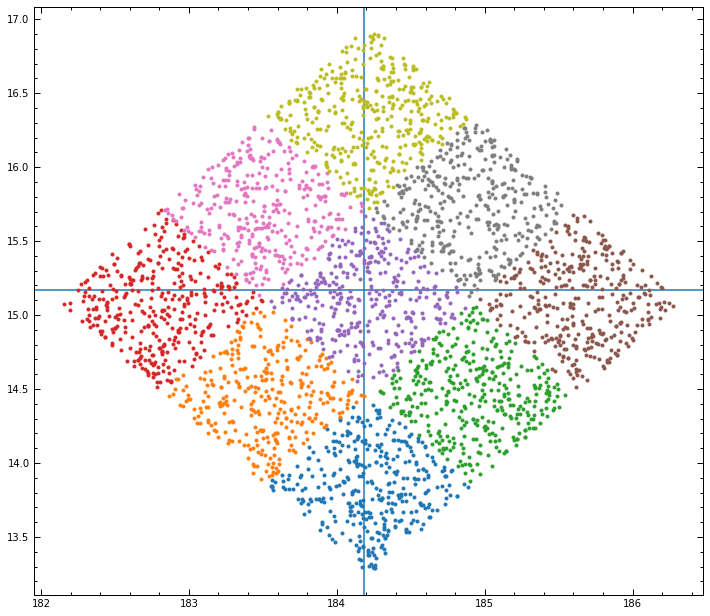

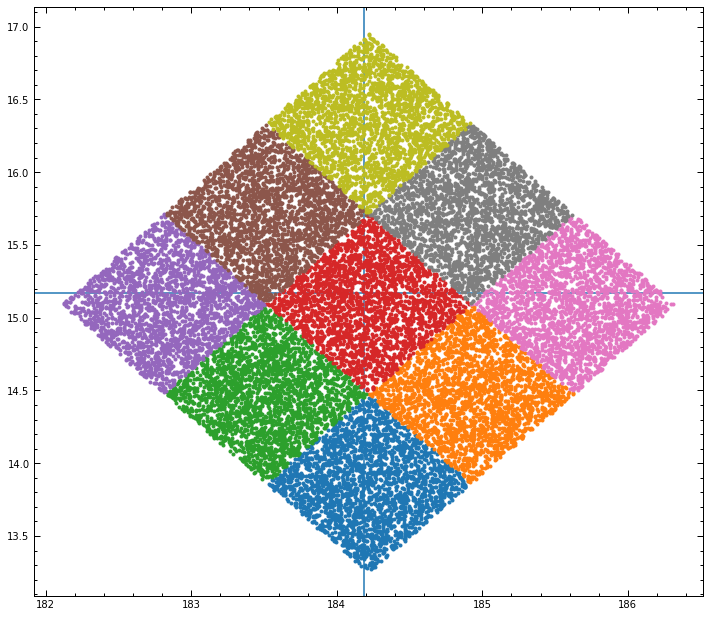

In [17]:
t0 = time.time()
data_combined = lvmguiding.get_cat_using_healpix(c,plotflag=True)
ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,mags,culled_cat = lvmguiding.find_guide_stars(c,pa=0,recycled_cat=data_combined)
t1 = time.time()
print()
print("Duration using healpix preselection: {:.4f} s".format(t1-t0))
print()

t0 = time.time()
data_combined = lvmguiding.get_cat_using_healpix2(c,plotflag=True)
ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,mags,culled_cat = lvmguiding.find_guide_stars(c,pa=0,recycled_cat=data_combined)
t1 = time.time()
print()
print("Duration using healpix preselection 2: {:.4f} s".format(t1-t0))
print()




t0 = time.time()
#data_combined = get_cat_using_healpix(c)
ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,mags,culled_cat = lvmguiding.find_guide_stars(c,pa=0,plotflag=False)
t1 = time.time()
print()
print("Duration using full Gaia cat: {:.4f} s".format(t1-t0))

In [63]:
len(data_combined)

3227

<SkyCoord (ICRS): (ra, dec) in deg
    (184.18604651, 15.16853933)>
PA:  0
Using the full cat for the first position
PA:  60
PA:  120
PA:  180
PA:  240
PA:  300


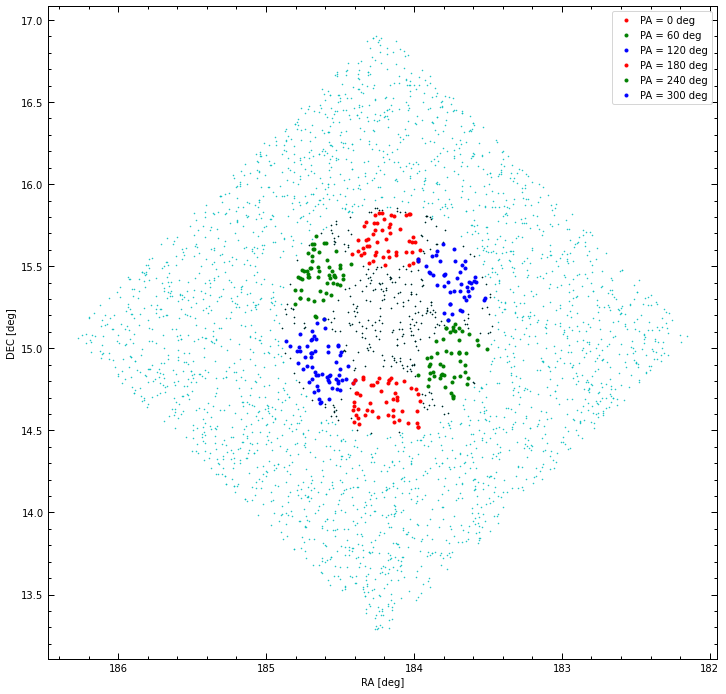

In [64]:

print(c)
color_array=["r","g","b","r","g","b"]


fig,ax = plt.subplots(figsize=(12,12))

ax.plot(data_combined["ra"],data_combined["dec"],"c.",ms=1)

for index,pa in enumerate([0,60,120,180,240,300]):
        print("PA: ",pa)
        if pa==0:
            print("Using the full cat for the first position")
            culled_cat=lvmguiding.cat_full
        ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,mags,culled_cat = lvmguiding.find_guide_stars(c,pa=pa,plotflag=False,recycled_cat=data_combined)
        
        if pa==0:
            ax.plot(culled_cat["ra"],culled_cat["dec"],"k.",ms=1)
        ax.plot(ras,decs,".",c=color_array[index],label="PA = "+str(pa)+" deg")
        
ax.legend()

ax.set_xlabel("RA [deg]")
ax.set_ylabel("DEC [deg]")
ax.invert_xaxis()

#fig.savefig("/home/haeberle/exchange/lvm/report/position_angles.png",bbox_inches="tight",facecolor="w",edgecolor="w",dpi=200)

## Create a synthetic image

In [ ]:
ras,decs,dd_x_mm,dd_y_mm,chip_xxs,chip_yys,mags,culled_cat = lvmguiding.find_guide_stars(c,pa=0,plotflag=False)

In [ ]:
standard_instrument = lvmguiding.InstrumentParameters()

In [ ]:
my_image = lvmguiding.make_synthetic_image(chip_x=chip_xxs,
                                           chip_y=chip_yys,
                                          gmag=mags,
                                          inst =standard_instrument,
                                          exp_time=5,
                                          seeing_arcsec=3.5,
                                          sky_flux=15)

In [ ]:
combined= my_image
fig,ax4 = plt.subplots(figsize=(12,8))

vmin4 = np.percentile(combined,25)
vmax4 = np.percentile(combined,99.5)

my_plot4 = ax4.imshow(combined,origin="lower",norm=LogNorm(vmin=np.max([vmin4,1]), vmax=vmax4))


#if np.sum(sn>5) < 10:
#    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\nWhite circle around all stars with S/N > 5 (N = {})".format(np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000),np.sum(sn>5)))
#    ax4.plot(x_position[sn>5],y_position[sn>5],"o",ms=40,markerfacecolor="none",markeredgecolor="w",label="gmag < 12")
#else:
#    ax4.set_title("Combined (Bias + Readout Error + Noisy Background + Noisy Stars)\nPointing: {}  Texp: {} s\n{} of {} stars have a S/N > 5\nBrightest star (red): gmag = {:.2f} ; F = {:.1f} e-/s\nPotentially saturated pixels (Ne- > 20000): {}\n".format(pointing_string,exp_time,np.sum(sn>5),len(gmag),np.min(gmag),gaia_flux[np.argmin(gmag)],np.sum(combined>20000)))
#ax4.plot(x_position[np.argmin(gmag)],y_position[np.argmin(gmag)],"o",ms=20,markerfacecolor="none",markeredgecolor="r",label="gmag < 12")
plt.colorbar(my_plot4,ax=ax4,fraction=0.046, pad=0.04)
#plt.colorbar(my_plot4,ax=ax,fraction=0.046, pad=0.04)
#ax4.legend()

fig.tight_layout()

#filename = "/home/haeberle/exchange/lvm/report/pointing_"+pointing_string+"_{:d}ms.png".format(int(1000*exp_time))
#fig.suptitle()
#fig.savefig("/home/haeberle/exchange/lvm/report/example_crowded_field.png",dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white")
#fig.savefig(filename,dpi=200,bbox_inches="tight",edgecolor="white",facecolor="white") 